## Метод наименьших квадратов

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

In [10]:
N = 30
x = np.linspace(-1, 1, N)
y = np.sin(x ** 3)
y = y + np.random.normal(0, 0.3, N)

In [11]:
x_true = np.linspace(-1, 1, 100)
y_true = np.sin(x_true)

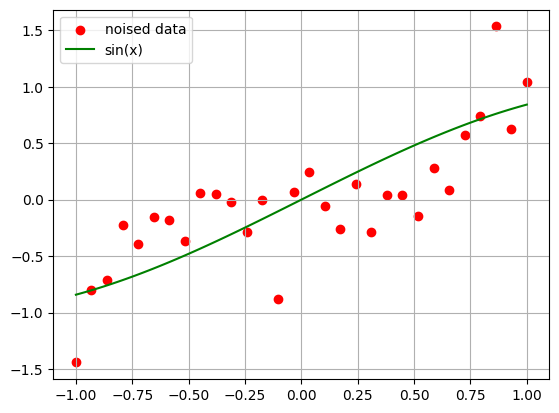

In [12]:
fig, ax = plt.subplots()
ax.scatter(x, y, label='noised data', c='r')
ax.plot(x_true, y_true, label='sin(x)', c='green')
ax.legend()
ax.grid()
plt.show()

In [16]:
deg = 9
A = np.array([x ** k for k in range(deg)]).T
alpha = np.linalg.inv(A.T @ A) @ A.T @ y
# l2_coef = 10
# alpha = np.linalg.inv(A.T @ A + l2_coef * np.eye(A.shape[1])) @ A.T @ y

In [17]:
alpha

array([-0.12428783,  0.23561661,  0.24162542, -1.77597534, -0.87925737,
        6.50381701,  4.78074223, -3.81518058, -4.27628747])

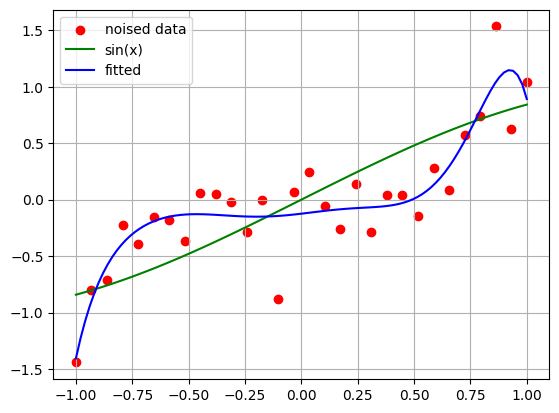

In [18]:
y_fitted = np.array([x_true ** k for k in range(deg)]).T @ alpha


fig, ax = plt.subplots()
ax.scatter(x, y, label='noised data', c='r')
ax.plot(x_true, y_true, label='sin(x)', c='green')
ax.plot(x_true, y_fitted, label='fitted', c='blue')
ax.legend()
ax.grid()
plt.show()

In [76]:
class MLS:
    def __init__(self, x, y, funcs):
        self.x = x
        self.y = y
        self.funcs = funcs
        self.alpha = None

    def fit(self):
        A = np.array([f(self.x) for f in self.funcs]).T
        self.alpha = np.linalg.inv(A.T @ A) @ A.T @ self.y

    def predict(self, x):
        if self.alpha is None:
            text = "Coefficients are not determined. Call fit"
            print(text)
            raise Exception(text)
        A = np.array([f(x) for f in self.funcs]).T
        return A @ self.alpha

In [77]:
def const(x):
    return np.ones(len(x))

def exp(x):
    return np.exp(x)

def eye(x):
    return x

In [78]:
# def lambda_maker(k):
#     return lambda x: x ** k

#funcs = [lambda_maker(k) for k in range(deg)]
funcs = [const, exp, eye]
reg = MLS(x, y, funcs)
reg.fit()

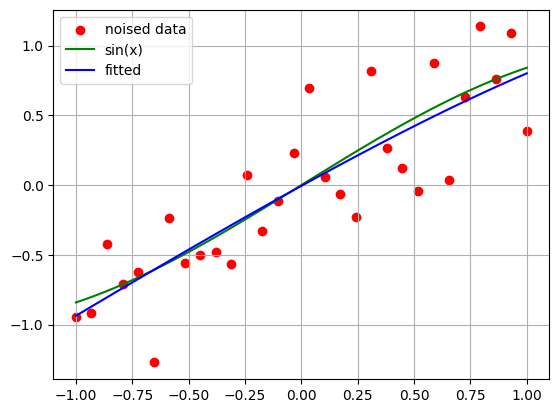

In [79]:
y_fitted = reg.predict(x_true)


fig, ax = plt.subplots()
ax.scatter(x, y, label='noised data', c='r')
ax.plot(x_true, y_true, label='sin(x)', c='green')
ax.plot(x_true, y_fitted, label='fitted', c='blue')
ax.legend()
ax.grid()
plt.show()

## Градиентный спуск

In [95]:
class LinearRegression:
    def __init__(self, learn_rate=1e-3, l2_coef=0):
        self.alpha = None
        self.learn_rate = learn_rate
        self.l2_coef = l2_coef

    def fit(self, X, y, n_iter=10):
        self.alpha = np.zeros(X.shape[1])
        for _ in range(n_iter):
            expr = self.learn_rate * 2 * (X.T @ X @ self.alpha - X.T @ y)
            # expr = 2 * self.learn_rate * (X.T @ (X @ self.alpha - y) + self.l2_coef * self.alpha)
            # print(expr)
            self.alpha -= expr

    def predict(self, X):
        return X @ self.alpha

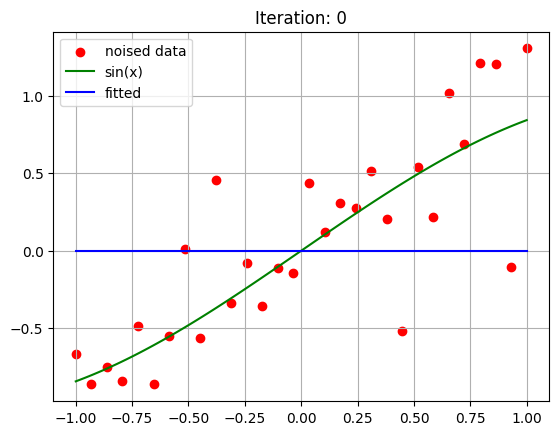

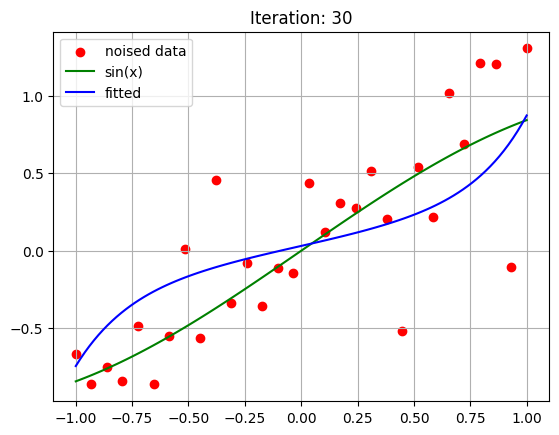

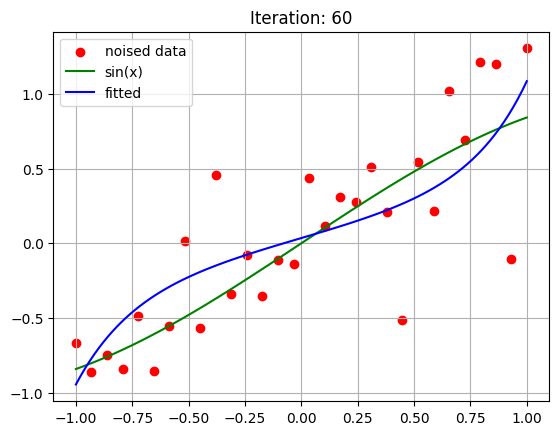

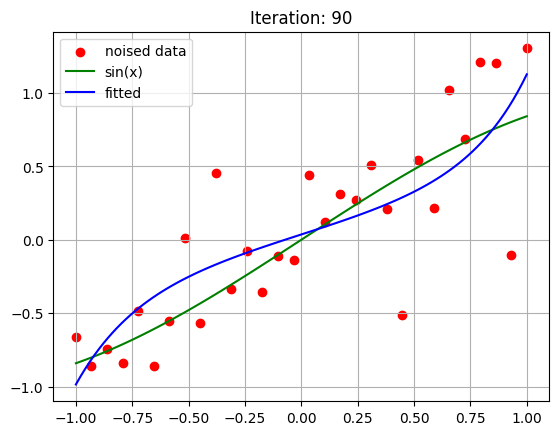

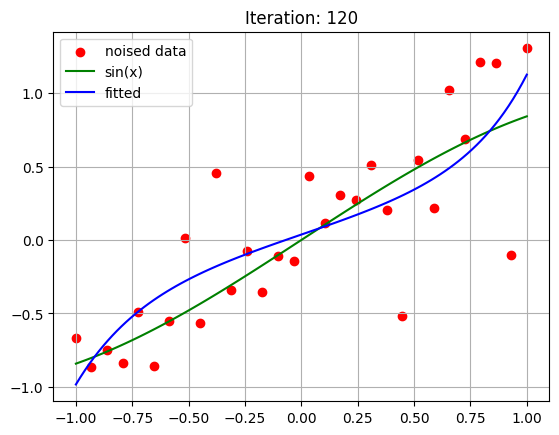

In [97]:
for i in range(150):
    reg = LinearRegression(learn_rate=1e-3)
    X = np.array([x ** k for k in range(deg)]).T
    reg.fit(X, y, n_iter=i)
    X_test = np.array([x_true ** k for k in range(deg)]).T
    y_fitted = reg.predict(X_test)

    if i % 30 == 0:
        fig, ax = plt.subplots()
        ax.scatter(x, y, label='noised data', c='r')
        ax.plot(x_true, y_true, label='sin(x)', c='green')
        ax.plot(x_true, y_fitted, label='fitted', c='blue')
        ax.legend()
        ax.set_title(f"Iteration: {i}")
        ax.grid()
        plt.show()

## Сплайн - интерполяция

На каждом отрезке $[x_{i - 1},x_{i}],\ i=\overline{1,N}$ функция $S(x)$ есть полином третьей степени $S_i(x)$, коэффициенты которого надо определить. Запишем для удобства $S_i(x)$ в виде:

$$S_i(x) = a_i + b_i(x - x_i) + {c_i}(x-x_i)^2 + {d_i}(x - x_i)^3$$

тогда

$$S_i\left(x_i\right) = a_i, \quad S'_i(x_i) = b_i, \quad S''_i(x_i) = 2c_i, \quad
S'''_i\left(x_i\right) = 6d_i \quad i=\overline{1,N}.$$

Условия непрерывности всех производных до второго порядка включительно
записываются в виде <br />
$$S_i\left(x_{i-1}\right) = S_{i-1}(x_{i-1}),$$
$$S'_i\left(x_{i-1}\right) = S'_{i-1}(x_{i-1}),$$
$$S''_i\left(x_{i-1}\right) = S''_{i-1}(x_{i-1}),$$

где $i$ меняется от $1$ до $N,$ а условия интерполяции в виде
$$S_i\left(x_{i}\right) = f(x_{i}).$$

Обозначим: $\quad h_i = x_i - x_{i-1}\quad (i = \overline{1,N}), \quad f_{i} = f(x_{i})\quad (i = \overline{0,N})$

Отсюда получаем формулы для вычисления коэффициентов "Естественного сплайна":
$$a_{i} = f(x_{i});$$
$$d_{i} = \frac{c_{i} - c_{i - 1}}{3 \cdot h_{i}};$$
$$b_{i} = \frac{a_{i} - a_{i - 1}}{h_{i}} + \frac{2 \cdot c_{i} + c_{i - 1}}{3} \cdot h_{i};$$
$$c_{i - 1} \cdot h_{i} + 2 \cdot c_{i} \cdot(h_{i} + h_{i+1}) + c_{i + 1} \cdot h_{i+1} = 3 \cdot \left(\frac{a_{i+1} - a_{i}}{h_{i+1}} - \frac{a_{i} - a_{i - 1}}{h_{i}}\right),$$
причем $c_{N} = S''(x_{N}) = 0$ и $c_{1} - 3 \cdot d_{1} \cdot h_{1} = S''(x_{0}) = 0$.



In [98]:
class Spline:
    def __init__(self, x, y):
        self.X = x
        self.Y = y
        self.h = self.X[1] - self.X[0]

        coef = np.zeros((len(self.X), len(self.X)))
        f = np.zeros(len(self.X))
        coef[0, 0] = 1
        coef[-1, -1] = 1

        for i in range(1, len(self.X) - 1):
            coef[i, i - 1] = self.h / 6
            coef[i, i] = 2 * self.h / 3
            coef[i, i + 1] = self.h / 6

            f[i] = (self.Y[i+1] - self.Y[i]) / self.h - (self.Y[i] - self.Y[i - 1]) / self.h

        self.c = np.linalg.solve(coef, f)

    def __call__(self, x):
        num_polynom = len(self.X)
        for i, X in enumerate(self.X):
            if x <= X:
                num_polynom = i
                break

        result = (self.c[num_polynom - 1] * (self.X[num_polynom] - x) ** 3 / (6 * self.h) +
                  self.c[num_polynom] * (x - self.X[num_polynom - 1]) ** 3 / (6 * self.h) +
                  (self.Y[num_polynom - 1] / self.h - self.c[num_polynom - 1] * self.h / 6) * (self.X[num_polynom] - x) +
                  (self.Y[num_polynom] / self.h - self.c[num_polynom] * self.h / 6) * (x - self.X[num_polynom - 1]))
        return result
        

In [102]:
x = np.linspace(0, 4, 10)
def foo(x):
    return np.sin(3*x ** 2)

y = foo(x)


In [103]:
sp = Spline(x, y)

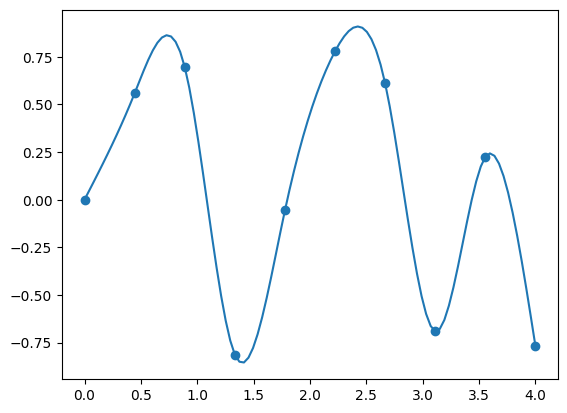

In [104]:
fig, ax = plt.subplots()
x1 = np.linspace(0, 4, 100)
ax.scatter(x, y)
#ax.scatter(x1, foo(x1))
ax.plot(x1, [sp(x) for x in x1])
plt.show()

# Задание:
Для каждой функции:
   - $sin(x)$
   - $\cos(10x)$
   - $x^2$
   - $e^x$

Взять N (от 10 до 30) точек и по ним, с помощью модуля scipy и numpy реализовать:
   - Сплайн интерполяция ([https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.CubicSpline.html#scipy.interpolate.CubicSpline](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.CubicSpline.html#scipy.interpolate.CubicSpline))
   - Интерполяцию Лагранжа ([https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.lagrange.html?highlight=lagrange#scipy.interpolate.lagrange](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.lagrange.html?highlight=lagrange#scipy.interpolate.lagrange))
   - МНК(добавив какой-либо <<шум>>) ([https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html)) Кол-во N точек должно быть больше степени многочлена, с помощью которого мы интерполируем.

Для каждой функции должен быть отрисован график с точками, исходная функция и полученная функция. Если поведение графика очень сильно отличается от условно-корректного, то необходимо описать почему это происходит и предложить методы решения этой проблемы. Посчитать среднюю ошибку между аппроксимирующей функцией и исходной (в узловых точках).

### Срок до понедельника